#### 다항회기/오버피팅(과대적합)/언더피팅(과소적합) -> p314
- 다항회기(Polynomial Regression): 다차원 다항식으로 두고 회귀 분석을 수행하는 것
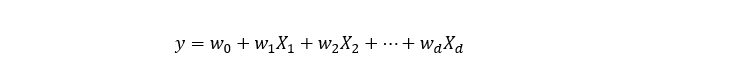


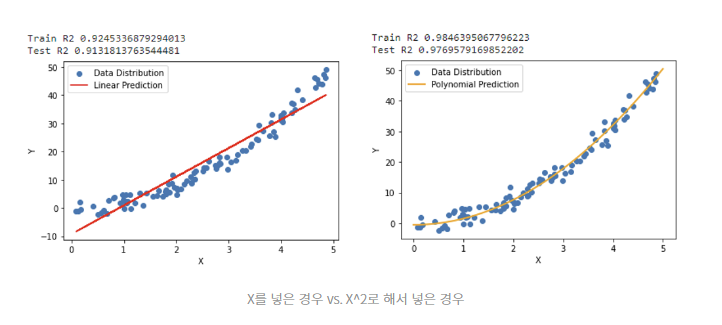

In [3]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# 다항식으로 변환한 단항식 생성, [[0, 1],[2, 3]]의 2x2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]


In [5]:
# degree=2 인 2차 다항식으로 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n',poly_ftr)

변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [8]:
import matplotlib.pyplot as plt

def make_data(size=100, noise=1):
    x = np.linspace(-5, 11, size).reshape(-1, 1)
    y = 3*x**2 + 3*x
 
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise  # 노이즈 추가
 
    plt.scatter(x, y)
    plt.suptitle("Sample Data", size=24)
    plt.show()
 
    return x, yy


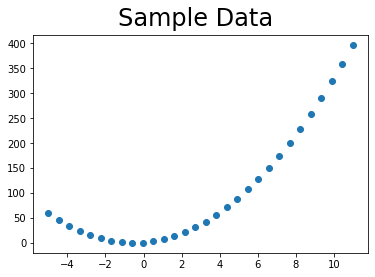

In [11]:
X,Y=make_data(30)

In [ ]:
from sklearn.ma